In [33]:
import numpy as np
import pandas as pd
#from scipy.misc import toimage

#Import from keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D

from tensorflow.keras.layers import MaxPool1D

#import from matplotlib
import matplotlib.pyplot as plt

In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

17465344/17464789 [==============================] - 4s 0us/step


In [4]:
# summarize data
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [5]:
#Summarize number of classes
print("Classes: ",np.unique(y))

Classes:  [0 1]


In [6]:
# Summarize number of words
print("Number of words: ", len(np.unique(np.hstack(X))))

Number of words:  88585


In [18]:
# Summarize review length
print("Review Length: ")
result = list(map(len, X))
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Review Length: 
Mean 234.76 words (172.911495)


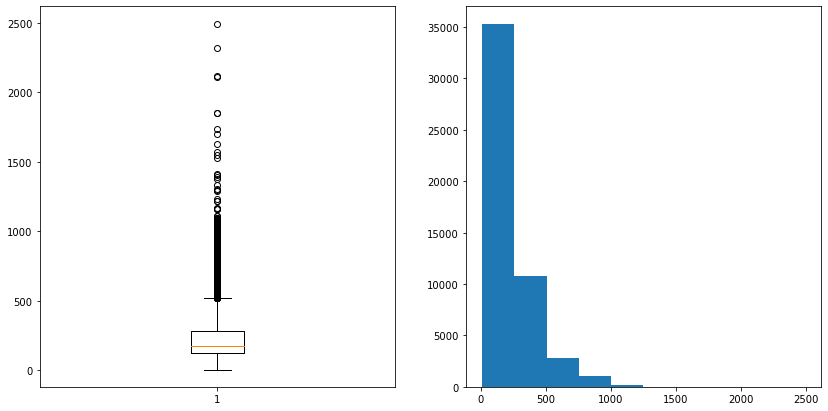

In [21]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

## Word Embeddings
This is a technique where words are encoded as real-valued vectors in a high dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.

## Simple Multilayer Perceptron Model

In [28]:
top_words = 5000
test_split = 0.33

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

In [29]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_words)
X_test = sequence.pad_sequences(X_test, maxlen = max_words)

In [30]:
# Create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 2, batch_size = 128, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose = 2)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/2
196/196 [==============================] - 13s 68ms/step - loss: 0.4373 - accuracy: 0.7786 - val_loss: 0.3213 - val_accuracy: 0.8602
Epoch 2/2
196/196 [==============================] - 14s 74ms/step - loss: 0.1628 - accuracy: 0.9404 - val_loss: 0.3181 - val_accuracy: 0.8701
782/782 - 4s - loss: 0.3181 - accuracy: 0.8701
Accuracy: 87.01%


## One Dimensional Convolutional Neural Network
Convolutional neural networks were designed to honor the spatial structure in image data whilst being robust to the position and orientation of learned objects in the scene. This same principle can be used on sequences, such as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model attractive for learning to recognize objects in images can help to learn structure in paragraphs of words, namely the techniques invariance to the specific position of features.

In [36]:
# Create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length = max_words))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(250, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

In [37]:
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 2, batch_size = 128, verbose = 1)
scores = model.evaluate(X_test, y_test, verbose = 2)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/2
196/196 [==============================] - 21s 107ms/step - loss: 0.4641 - accuracy: 0.7499 - val_loss: 0.2777 - val_accuracy: 0.8839
Epoch 2/2
196/196 [==============================] - 19s 99ms/step - loss: 0.2177 - accuracy: 0.9148 - val_loss: 0.2857 - val_accuracy: 0.8816
782/782 - 5s - loss: 0.2857 - accuracy: 0.8816
Accuracy: 88.16%
